# Introduction

This jupyter (Python 2) notebook presents:

1) Code for the six bias-corrected estimators developed in Dove, Heath and Heaton (2017), <i> Bias-Corrected Estimation of Price Impact in Securities Litigation</i>.

2) Replication code for all figures and tables in the paper.

[(Link to paper)](https://papers.ssrn.com/abstract=3005878)

The notebook requires the packages: pandas, numpy, matplotlib, seaborn, pylab, scipy, math

... all of which come with a good free scientific Python distro such as [Anaconda](https://anaconda.org/) or [Enthought](https://www.enthought.com/).

# Import the data

In [65]:
import pandas, numpy as np

# The csv file contains 10 blocks
# Each block is 100 consecutive daily market-adjusted returns for a single stock
# Drawn from all high-volatility (sigma > 0.04) U.S. common stocks between 1/1/2010 and 12/31/2015.

Data=pandas.read_csv('daily_mktadj_rtns.csv')
print Data.head()
nblocks = 10

# Set up the data:

nonevent_rtns = list()
for i in range(nblocks):
    returns = Data.loc[Data.block==i+1,'adjret'].values
    nonevent_rtns.append(np.sort(returns))

SQ_cutoff5 = dict()
for i in range(nblocks):
    SQ_cutoff5[i] = nonevent_rtns[i][4]

SQ_cutoff2pt5 = dict()
for i in range(nblocks):
    SQ_cutoff2pt5[i] = (nonevent_rtns[i][1] + nonevent_rtns[i][2])/2

ttest2S_cutoff5 = dict()
for i in range(nblocks):
    ttest2S_cutoff5[i] = np.std(nonevent_rtns[i]) * -1.984

ttest1S_cutoff5 = dict()
for i in range(nblocks):
    ttest1S_cutoff5[i] = np.std(nonevent_rtns[i]) * -1.66



# Grid of simulated "true" price impacts:
true_price_impacts= np.arange(-0.3,0.01,0.01)

   adjret  block
0 -0.0199      1
1 -0.0054      1
2  0.0007      1
3 -0.0068      1
4 -0.0199      1


# Paper Figure 1b

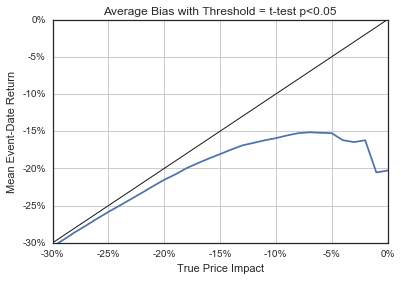

In [66]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn 
seaborn.set_style("white")

biases_ttest2s=list()
for true_price_impact in true_price_impacts:
    templist = list()
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest2S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            censored_event_returns100 = np.random.choice(censored_event_returns,100)
            censoredmean=np.mean(censored_event_returns) - np.mean(simulated_event_returns) + true_price_impact
            templist.append(censoredmean)
    biases_ttest2s.append(np.nanmean(templist))
    
    
    

fig = plt.figure()
plot(true_price_impacts, true_price_impacts, color="k", linewidth = 0.9)
plot(true_price_impacts, biases_ttest2s)
axes = plt.gca()
axes.set_xlim([-0.3,0.0])
axes.set_ylim([-0.3,0.0])
axes.xaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
axes.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
plt.legend(loc='upper right', fontsize='small')

xlabel('True Price Impact')
ylabel('Mean Event-Date Return')
title('Average Bias with Threshold = t-test p<0.05')
grid(True)

plt.show()

#Paper Figure 1b

In [67]:
print "True price impact:", true_price_impacts[5]
print "Average event-date return for true price impact of -25%:", biases_ttest2s[5]
print "Average bias for true price impact of -25%:", biases_ttest2s[5] - true_price_impacts[5]

True price impact: -0.25
Average event-date return for true price impact of -25%: -0.258508430496
Average bias for true price impact of -25%: -0.00850843049566


# Paper Figure 2

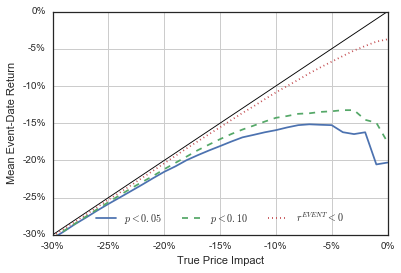

In [68]:
from pylab import *
from matplotlib.ticker import FuncFormatter
#Paper Figure 2


biases_negative=list()
for true_price_impact in true_price_impacts:
    templist = list()
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<0]
        if len(censored_event_returns) > 0:
            censored_event_returns100 = np.random.choice(censored_event_returns,100)
            censoredmean=np.mean(censored_event_returns) - np.mean(simulated_event_returns) + true_price_impact
            templist.append(censoredmean)
    biases_negative.append(np.nanmean(templist))
    

biases_ttest2s_10=list()
for true_price_impact in true_price_impacts:
    templist = list()
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest1S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            censored_event_returns100 = np.random.choice(censored_event_returns,100)
            censoredmean=np.mean(censored_event_returns) - np.mean(simulated_event_returns) + true_price_impact
            templist.append(censoredmean)
    biases_ttest2s_10.append(np.nanmean(templist))
    


fig = plt.figure()
plot(true_price_impacts, true_price_impacts, color="k", linewidth = 0.9)
plot(true_price_impacts, biases_ttest2s, label = "$p<0.05$")
plot(true_price_impacts, biases_ttest2s_10, label = "$p<0.10$", linestyle='dashed')
plot(true_price_impacts, biases_negative, label = "$r^{EVENT} < 0$", linestyle="dotted")
axes = plt.gca()
axes.set_xlim([-0.3,0.0])
axes.set_ylim([-0.3,0.0])
axes.xaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
axes.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
plt.legend(loc='upper right', fontsize='small')

xlabel('True Price Impact')
ylabel('Mean Event-Date Return')
grid(True)
plt.legend(loc='lower center', ncol=3)

plt.show()

#Paper Figure 2

# Paper Table 1

In [69]:
biases_ttest2s_5=list()
for true_price_impact in true_price_impacts:
    templist = list()
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest2S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            censored_event_returns100 = np.random.choice(censored_event_returns,100)
            censoredmean=np.mean(censored_event_returns) - np.mean(simulated_event_returns) + true_price_impact
            templist.append(censoredmean)
    biases_ttest2s_5.append(np.nanmean(templist))


biases_ttest2s_10=list()
for true_price_impact in true_price_impacts:
    templist = list()
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest1S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            censored_event_returns100 = np.random.choice(censored_event_returns,100)
            censoredmean=np.mean(censored_event_returns) - np.mean(simulated_event_returns) + true_price_impact
            templist.append(censoredmean)
    biases_ttest2s_10.append(np.nanmean(templist))

    

biases_SQ_2pt5=list()
for true_price_impact in true_price_impacts:
    templist = list()
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<SQ_cutoff2pt5[i]]
        if len(censored_event_returns) > 0:
            censored_event_returns100 = np.random.choice(censored_event_returns,100)
            censoredmean=np.mean(censored_event_returns) - np.mean(simulated_event_returns) + true_price_impact
            templist.append(censoredmean)
    biases_SQ_2pt5.append(np.mean(templist))



biases_SQ_5=list()
for true_price_impact in true_price_impacts:
    templist = list()
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<SQ_cutoff5[i]]
        if len(censored_event_returns) > 0:
            censored_event_returns100 = np.random.choice(censored_event_returns,100)
            censoredmean=np.mean(censored_event_returns) - np.mean(simulated_event_returns) + true_price_impact
            templist.append(censoredmean)
    biases_SQ_5.append(np.mean(templist))




print "Biases when using:"
print "True Price Impact / 2 tail t-test 5% / 1 tail t-test 5% / SQ test 2.5% / SQ test 5%"
for ct in range(0,30,5):
    print int(true_price_impacts[ct]*100-.001), '/', \
        round((biases_ttest2s_5[ct] - true_price_impacts[ct])*100,2), '/', \
        round((biases_ttest2s_10[ct] - true_price_impacts[ct])*100,2), '/', \
        round((biases_SQ_2pt5[ct] - true_price_impacts[ct])*100,2), '/', \
        round((biases_SQ_5[ct] - true_price_impacts[ct])*100,2)

        

#Paper Table 1

Biases when using:
True Price Impact / 2 tail t-test 5% / 1 tail t-test 5% / SQ test 2.5% / SQ test 5%
-30 / -0.5 / -0.45 / -0.53 / -0.37
-25 / -0.85 / -0.62 / -0.74 / -0.56
-20 / -1.53 / -1.18 / -1.34 / -0.91
-15 / -3.08 / -2.15 / -2.59 / -1.74
-10 / -5.94 / -4.28 / -5.01 / -3.31
-5 / -10.27 / -8.4 / -9.86 / -6.79


# 
# 
# 
# 
# 
# 
# 
# Bias Corrected Estimators

In [70]:
import scipy.stats as stats
import math


#Analytical BC, assumes normality.
def ABC(event_rtn, non_event_excessrtrns, cutoff):
    sigma = np.std(non_event_excessrtrns)
    bias = - stats.norm.pdf((cutoff - event_rtn)/sigma)/stats.norm.cdf((cutoff - event_rtn)/sigma)*sigma
    theta = event_rtn - bias
    return theta, bias


#Constant BC (Mackinnon and Smith 1998)
def CBC(event_rtn, non_event_excessrtrns, cutoff):
    sim_events1 = event_rtn + non_event_excessrtrns
    sim_events1_censored = sim_events1[sim_events1 < cutoff]
    bias1 = np.mean(sim_events1_censored) - np.mean(sim_events1)
    theta1 = event_rtn - bias1
    return theta1, bias1


#Median-unbiased BC (Andrews 1993)
def MBC(event_rtn, non_event_excessrtrns, cutoff):
    theta = event_rtn
    sim_events = theta + non_event_excessrtrns
    sim_events_censored = sim_events[sim_events < cutoff]
    while np.median(sim_events_censored) < event_rtn and theta < 0:
        theta = theta + 0.001
        sim_events = sim_events + 0.001
        sim_events_censored = sim_events[sim_events < cutoff]
    theta_backup = theta - 0.001
    sim_events_backup = theta_backup + non_event_excessrtrns
    sim_events_censored_backup = sim_events_backup[sim_events_backup < cutoff]
    if abs(np.median(sim_events_censored_backup) - event_rtn) < abs(np.median(sim_events_censored) - event_rtn):
        bias_backup = event_rtn - theta_backup
        return theta_backup, bias_backup
    else:
        bias = event_rtn - theta
        return theta, bias


#Linear BC (Mackinnon and Smith 1998)
def LBC(event_rtn, non_event_excessrtrns, cutoff):
    sim_events1 = event_rtn + non_event_excessrtrns
    sim_events1_censored = sim_events1[sim_events1 < cutoff]
    bias1 = np.mean(sim_events1_censored) - np.mean(sim_events1)
    theta1 = event_rtn - bias1
    #CBC estimator = theta1
    #linear bias correction:
    if abs(theta1 - event_rtn) < 0.0001:
        return theta1, bias1
    else:
        sim_events2 = theta1 + non_event_excessrtrns
        sim_events2_censored = sim_events2[sim_events2 < cutoff]
        bias2 = np.mean(sim_events2_censored) - np.mean(sim_events2)
        #Bias evaluated at CBC estimate =  bias2
        beta = (bias1 - bias2) / (event_rtn - theta1)
        alpha = bias1 - beta * event_rtn
        theta2 = 1 / (1+beta) * (event_rtn - alpha)
        bias3 = theta2 - event_rtn
        #sometimes the LBC estimator blows up;
        #in those cases return the CBC estimator.
        if theta2 > 0 or theta2 < event_rtn or math.isnan(theta2):
            return theta1, bias1
        else:
            return theta2, bias3


#Nonlinear BC(Mackinnon and Smith 1998)
def NBC(event_rtn, non_event_excessrtrns, cutoff, gamma=1):
    sim_events1 = event_rtn + non_event_excessrtrns
    sim_events1_censored = sim_events1[sim_events1 < cutoff]
    bias1 = np.mean(sim_events1_censored) - np.mean(sim_events1)
    theta1 = event_rtn - bias1
    bias_seq = list()
    theta_seq = list()
    theta_prev = -999
    theta = event_rtn
    while abs(theta_prev - theta) > 0.001:
        sim_events = theta + non_event_excessrtrns
        sim_events_censored = sim_events[sim_events < cutoff]
        bias = np.mean(sim_events_censored) - np.mean(sim_events)
        bias_seq.append(bias)
        theta_prev = theta
        theta_seq.append(theta)
        theta = (1 - gamma) * theta + gamma * (event_rtn - bias)
        #sometimes the NBC estimator blows up;
        #in those cases return the CBC estimator.
        if theta > 0 or theta < event_rtn or math.isnan(theta):
            return event_rtn, bias_seq, theta_seq
            break
    return theta, bias_seq, theta_seq


# Paper Table 2

In [71]:
#Using a two tailed t-test (p < 0.05)

Uncorrected_mean=list()
Uncorrected_median=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest2S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([rtn for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        Uncorrected_mean.append(np.mean(temp))
        Uncorrected_median.append(np.median(temp))


print 'ABC (running)'
ABC_mean=list()
ABC_mae=list()
ABC_median=list()
ABC_std=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest2S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([ABC(rtn, nonevent_rtns[i], ttest2S_cutoff5[i])[0] 
                    for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)        
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        ABC_mean.append(np.mean(temp))
        ABC_median.append(np.median(temp))


print 'CBC (running)'
CBC_mean=list()
CBC_mae=list()
CBC_median=list()
CBC_std=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest2S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([CBC(rtn, nonevent_rtns[i], ttest2S_cutoff5[i])[0] 
                               for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        CBC_mean.append(np.mean(temp))
        CBC_median.append(np.median(temp))

print 'MBC (running)'
MBC_mean=list()
MBC_mae=list()
MBC_median=list()
MBC_std=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest2S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([MBC(rtn, nonevent_rtns[i], ttest2S_cutoff5[i])[0] 
                               for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        MBC_mean.append(np.mean(temp))
        MBC_median.append(np.median(temp))


print 'LBC (running)'
LBC_mean=list()
LBC_mae=list()
LBC_median=list()
LBC_std=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest2S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([LBC(rtn, nonevent_rtns[i], ttest2S_cutoff5[i])[0] 
                               for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        LBC_mean.append(np.mean(temp))
        LBC_median.append(np.median(temp))



print 'NBC (running)'
NBC_mean=list()
NBC_mae=list()
NBC_median=list()
NBC_std=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest2S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([NBC(rtn, nonevent_rtns[i], ttest2S_cutoff5[i])[0] 
                               for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        NBC_mean.append(np.mean(temp))
        NBC_median.append(np.median(temp))


print 'Done! \n'        
print 'Two sided t-test, 5 percent level \n'
print 'True Price Impact / Uncorrected / ABC / CBC / MBC / LBC / NBC'

for ct in range(0,30,5):
    print int(true_price_impacts[ct]*100-.001), '/', \
        round(Uncorrected_mean[ct]*100,2), '/', \
        round(ABC_mean[ct]*100,2), '/', \
        round(CBC_mean[ct]*100,2), '/', \
        round(MBC_mean[ct]*100,2), '/', \
        round(LBC_mean[ct]*100,2), '/', \
        round(NBC_mean[ct]*100,2)

print ''

for ct in range(0,30,5):
    print int(true_price_impacts[ct]*100-.001), '/', \
        round(Uncorrected_median[ct]*100,2), '/', \
        round(ABC_median[ct]*100,2), '/', \
        round(CBC_median[ct]*100,2), '/', \
        round(MBC_median[ct]*100,2), '/', \
        round(LBC_median[ct]*100,2), '/', \
        round(NBC_median[ct]*100,2)

#Paper table 2

ABC (running)
CBC (running)
MBC (running)
LBC (running)
NBC (running)
Done! 

Two sided t-test, 5 percent level 

True Price Impact / Uncorrected / ABC / CBC / MBC / LBC / NBC
-30 / -0.44 / 0.05 / 0.07 / 0.05 / 0.49 / -0.18
-25 / -1.03 / 0.12 / -0.23 / 0.48 / 0.55 / 0.11
-20 / -1.58 / 0.15 / -0.19 / 0.66 / 0.74 / 0.73
-15 / -3.11 / -0.78 / -1.12 / 0.01 / -0.02 / -0.39
-10 / -6.03 / -2.93 / -3.59 / -1.69 / -1.72 / -3.21
-5 / -10.23 / -6.9 / -7.58 / -4.2 / -4.97 / -5.91

-30 / -0.53 / -0.26 / -0.19 / -0.41 / 0.01 / -0.24
-25 / -0.87 / -0.09 / -0.29 / -0.11 / -0.05 / -0.14
-20 / -1.08 / 0.33 / 0.17 / 0.05 / 0.64 / 0.5
-15 / -2.24 / -0.18 / -0.54 / -0.18 / 0.13 / -0.2
-10 / -4.21 / -1.39 / -1.95 / -0.87 / -0.88 / -2.65
-5 / -7.46 / -4.58 / -5.1 / -1.76 / -2.82 / -5.0


# Paper Figure 3

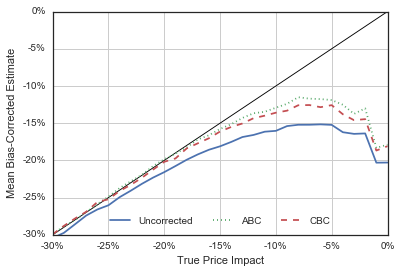

In [72]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.ticker import FuncFormatter

fig = plt.figure()
plot(true_price_impacts, true_price_impacts, color="k", linewidth = 0.9)
plot(true_price_impacts, Uncorrected_mean+true_price_impacts, label='Uncorrected')
plot(true_price_impacts, ABC_mean+true_price_impacts, label='ABC',linestyle='dotted')
plot(true_price_impacts, CBC_mean+true_price_impacts, label='CBC', linestyle='dashed')



xlabel('True Price Impact')
ylabel('Mean Bias-Corrected Estimate')
plt.legend(loc='lower center', ncol=3)
grid(True)

axes = plt.gca()
axes.xaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
axes.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
axes.set_xlim([-0.3,0.0])
axes.set_ylim([-0.3,0.0])

plt.show()
#Paper Figure 3a

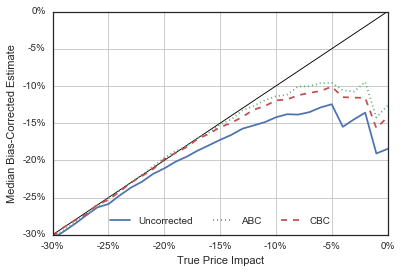

In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.ticker import FuncFormatter

fig = plt.figure()
plot(true_price_impacts, true_price_impacts, color="k", linewidth = 0.9)
plot(true_price_impacts, Uncorrected_median+true_price_impacts, label='Uncorrected')
plot(true_price_impacts, ABC_median+true_price_impacts, label='ABC',linestyle='dotted')
plot(true_price_impacts, CBC_median+true_price_impacts, label='CBC', linestyle='dashed')



xlabel('True Price Impact')
ylabel('Median Bias-Corrected Estimate')
plt.legend(loc='lower center', ncol=3)
grid(True)

axes = plt.gca()
axes.xaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
axes.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
axes.set_xlim([-0.3,0.0])
axes.set_ylim([-0.3,0.0])

plt.show()
#Paper Figure 3b

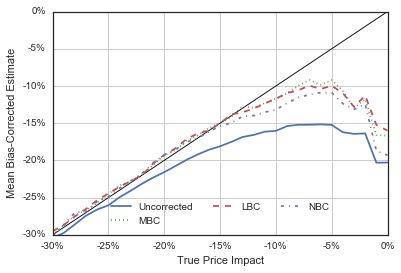

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.ticker import FuncFormatter

fig = plt.figure()
plot(true_price_impacts, true_price_impacts, color="k", linewidth = 0.9)
plot(true_price_impacts, Uncorrected_mean+true_price_impacts, label='Uncorrected')
plot(true_price_impacts, MBC_mean+true_price_impacts, label='MBC',linestyle='dotted')
plot(true_price_impacts, LBC_mean+true_price_impacts, label='LBC', linestyle='dashed')
plot(true_price_impacts, NBC_mean+true_price_impacts, label='NBC', linestyle='dashdot')



xlabel('True Price Impact')
ylabel('Mean Bias-Corrected Estimate')
plt.legend(loc='lower center', ncol=3)
grid(True)

axes = plt.gca()
axes.xaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
axes.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
axes.set_xlim([-0.3,0.0])
axes.set_ylim([-0.3,0.0])

plt.show()
#Paper Figure 3c

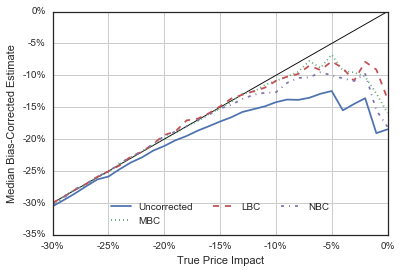

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.ticker import FuncFormatter

fig = plt.figure()
plot(true_price_impacts, true_price_impacts, color="k", linewidth = 0.9)
plot(true_price_impacts, Uncorrected_median+true_price_impacts, label='Uncorrected')
plot(true_price_impacts, MBC_median+true_price_impacts, label='MBC',linestyle='dotted')
plot(true_price_impacts, LBC_median+true_price_impacts, label='LBC', linestyle='dashed')
plot(true_price_impacts, NBC_median+true_price_impacts, label='NBC', linestyle='dashdot')



xlabel('True Price Impact')
ylabel('Median Bias-Corrected Estimate')
plt.legend(loc='lower center', ncol=3)
grid(True)

axes = plt.gca()
axes.xaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
axes.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
axes.set_xlim([-0.3,0.0])
axes.set_ylim([-.35,0.0])

plt.show()
#Paper Figure 3d

# Appendix Table 1

In [76]:
#Using a one tailed t-test (p < 0.05)
#This cell takes a few minutes to run

Uncorrected_mean=list()
Uncorrected_median=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest1S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([rtn for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        Uncorrected_mean.append(np.mean(temp))
        Uncorrected_median.append(np.median(temp))


print 'ABC (running)'
ABC_mean=list()
ABC_median=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest1S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([ABC(rtn, nonevent_rtns[i], ttest1S_cutoff5[i])[0] 
                    for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)        
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        ABC_mean.append(np.mean(temp))
        ABC_median.append(np.median(temp))


print 'CBC (running)'
CBC_mean=list()
CBC_median=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest1S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([CBC(rtn, nonevent_rtns[i], ttest1S_cutoff5[i])[0] 
                               for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        CBC_mean.append(np.mean(temp))
        CBC_median.append(np.median(temp))


print 'MBC (running)'
MBC_mean=list()
MBC_median=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest1S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([MBC(rtn, nonevent_rtns[i], ttest1S_cutoff5[i])[0] 
                               for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        MBC_mean.append(np.mean(temp))
        MBC_median.append(np.median(temp))


print 'LBC (running)'
LBC_mean=list()
LBC_median=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest1S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([LBC(rtn, nonevent_rtns[i], ttest1S_cutoff5[i])[0] 
                               for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        LBC_mean.append(np.mean(temp))
        LBC_median.append(np.median(temp))


    
print 'NBC (running)'
NBC_mean=list()
NBC_median=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<ttest1S_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([NBC(rtn, nonevent_rtns[i], ttest1S_cutoff5[i])[0] 
                               for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        NBC_mean.append(np.mean(temp))
        NBC_median.append(np.median(temp))


print 'Done! \n'
print 'One Sided t Test, p < 0.05 \n'
print 'True Price Impact / Uncorrected / ABC / CBC / MBC / LBC / NBC'

for ct in range(0,30,5):
    print int(true_price_impacts[ct]*100-.001), '/', \
        round(Uncorrected_mean[ct]*100,2), '/', \
        round(ABC_mean[ct]*100,2), '/', \
        round(CBC_mean[ct]*100,2), '/', \
        round(MBC_mean[ct]*100,2), '/', \
        round(LBC_mean[ct]*100,2), '/', \
        round(NBC_mean[ct]*100,2)

print ''

for ct in range(0,30,5):
    print int(true_price_impacts[ct]*100-.001), '/', \
        round(Uncorrected_median[ct]*100,2), '/', \
        round(ABC_median[ct]*100,2), '/', \
        round(CBC_median[ct]*100,2), '/', \
        round(MBC_median[ct]*100,2), '/', \
        round(LBC_median[ct]*100,2), '/', \
        round(NBC_median[ct]*100,2)


#Appendix Table 1

ABC (running)
CBC (running)
MBC (running)
LBC (running)
NBC (running)
Done! 

One Sided t Test, p < 0.05 

True Price Impact / Uncorrected / ABC / CBC / MBC / LBC / NBC
-30 / -0.27 / -0.33 / 0.27 / -0.09 / 0.07 / 0.31
-25 / -0.73 / -0.02 / 0.09 / 0.15 / 0.56 / 0.46
-20 / -1.19 / -0.3 / -0.04 / 0.15 / 0.43 / 0.35
-15 / -2.2 / -0.13 / -0.23 / 0.58 / 0.28 / 0.06
-10 / -4.16 / -1.55 / -2.43 / -0.28 / -1.04 / -1.11
-5 / -8.22 / -4.97 / -6.01 / -3.47 / -4.02 / -4.88

-30 / -0.32 / -0.52 / -0.05 / -0.25 / -0.01 / -0.02
-25 / -0.66 / -0.26 / -0.05 / -0.16 / 0.03 / 0.01
-20 / -0.91 / -0.3 / -0.11 / -0.03 / 0.4 / 0.09
-15 / -1.49 / 0.27 / 0.19 / 0.02 / 0.37 / -0.05
-10 / -3.51 / -0.28 / -1.46 / -0.02 / -0.24 / -0.59
-5 / -6.55 / -3.36 / -4.12 / -2.87 / -2.82 / -4.09


# Appendix Table 2

In [15]:
#Using the SQ test (p < 0.05)
#This cell takes a few minutes to run

Uncorrected_mean=list()
Uncorrected_median=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<SQ_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([rtn for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        Uncorrected_mean.append(np.mean(temp))
        Uncorrected_median.append(np.median(temp))


print 'ABC (running)'
ABC_mean=list()
ABC_median=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<SQ_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([ABC(rtn, nonevent_rtns[i], SQ_cutoff5[i])[0] 
                    for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)        
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        ABC_mean.append(np.mean(temp))
        ABC_median.append(np.median(temp))


print 'CBC (running)'
CBC_mean=list()
CBC_median=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<SQ_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([CBC(rtn, nonevent_rtns[i], SQ_cutoff5[i])[0] 
                               for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        CBC_mean.append(np.mean(temp))
        CBC_median.append(np.median(temp))


print 'MBC (running)'
MBC_mean=list()
MBC_median=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<SQ_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([MBC(rtn, nonevent_rtns[i], SQ_cutoff5[i])[0] 
                               for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        MBC_mean.append(np.mean(temp))
        MBC_median.append(np.median(temp))


print 'LBC (running)'
LBC_mean=list()
LBC_median=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<SQ_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([LBC(rtn, nonevent_rtns[i], SQ_cutoff5[i])[0] 
                               for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        LBC_mean.append(np.mean(temp))
        LBC_median.append(np.median(temp))


    
print 'NBC (running)'
NBC_mean=list()
NBC_median=list()
for true_price_impact in true_price_impacts:
    temp = np.zeros(0)
    for i in range(nblocks):
        simulated_event_returns = true_price_impact + nonevent_rtns[i]
        censored_event_returns = simulated_event_returns[simulated_event_returns<SQ_cutoff5[i]]
        if len(censored_event_returns) > 0:
            BC_returns = np.array([NBC(rtn, nonevent_rtns[i], SQ_cutoff5[i])[0] 
                               for rtn in np.random.choice(censored_event_returns,100)])
            temp = np.append(temp, BC_returns - true_price_impact)
    temp = temp[~np.isnan(temp)]
    if temp.size !=0: #nonempty
        NBC_mean.append(np.mean(temp))
        NBC_median.append(np.median(temp))

print 'Done! \n'
print 'SQ Test, p < 0.05 \n'
print 'True Price Impact / Uncorrected / ABC / CBC / MBC / LBC / NBC'

for ct in range(0,30,5):
    print int(true_price_impacts[ct]*100-.001), '/', \
        round(Uncorrected_mean[ct]*100,2), '/', \
        round(ABC_mean[ct]*100,2), '/', \
        round(CBC_mean[ct]*100,2), '/', \
        round(MBC_mean[ct]*100,2), '/', \
        round(LBC_mean[ct]*100,2), '/', \
        round(NBC_mean[ct]*100,2)

print ''

for ct in range(0,30,5):
    print int(true_price_impacts[ct]*100-.001), '/', \
        round(Uncorrected_median[ct]*100,2), '/', \
        round(ABC_median[ct]*100,2), '/', \
        round(CBC_median[ct]*100,2), '/', \
        round(MBC_median[ct]*100,2), '/', \
        round(LBC_median[ct]*100,2), '/', \
        round(NBC_median[ct]*100,2)


#Appendix Table 2

ABC (running)
CBC (running)
MBC (running)
LBC (running)
NBC (running)
Done! 

SQ Test, p < 0.05 

True Price Impact / Uncorrected / ABC / CBC / MBC / LBC / NBC
-30 / -0.29 / -0.02 / -0.02 / 0.1 / 0.05 / 0.06
-25 / -0.34 / 0.07 / -0.03 / 0.1 / 0.13 / 0.13
-20 / -0.6 / 0.11 / 0.02 / 0.2 / 0.19 / 0.22
-15 / -1.03 / 0.24 / -0.03 / 0.31 / 0.3 / 0.19
-10 / -2.1 / -0.05 / -0.69 / 0.23 / 0.17 / -0.48
-5 / -5.21 / -2.4 / -3.22 / -1.57 / -2.09 / -3.33

-30 / -0.3 / -0.18 / -0.05 / 0.0 / -0.09 / -0.05
-25 / -0.27 / -0.14 / -0.07 / 0.02 / -0.02 / -0.01
-20 / -0.45 / -0.07 / 0.05 / 0.04 / 0.08 / 0.08
-15 / -0.57 / 0.14 / 0.18 / 0.05 / 0.27 / 0.16
-10 / -1.33 / 0.35 / -0.1 / 0.01 / 0.54 / -0.09
-5 / -4.12 / -1.38 / -2.06 / -0.8 / -0.85 / -2.57
